In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings

In [3]:
df = pd.read_csv('fraudTrain.csv')
df1=pd.read_csv('fraudTest.csv') 
ypre_KNN = pd.read_csv('krish_ypred_knn.csv')

In [4]:
label_encoder = LabelEncoder()
df['encoded_merchant'] = label_encoder.fit_transform(df['merchant'])
df['encoded_trans_date_trans_time'] = label_encoder.fit_transform(df['trans_date_trans_time'])
df['encoded_category'] = label_encoder.fit_transform(df['category'])
df['encoded_first'] = label_encoder.fit_transform(df['first'])
df['encoded_last'] = label_encoder.fit_transform(df['last'])
df['encoded_gender'] = label_encoder.fit_transform(df['gender'])
df['encoded_street'] = label_encoder.fit_transform(df['street'])
df['encoded_job'] = label_encoder.fit_transform(df['job'])
df['encoded_transNum'] = label_encoder.fit_transform(df['trans_num'])
df['encoded_city'] = label_encoder.fit_transform(df['city'])
df['encoded_state'] = label_encoder.fit_transform(df['state'])
df['encoded_dob'] = label_encoder.fit_transform(df['dob'])

In [5]:
df.head

<bound method NDFrame.head of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann 

In [6]:
label_encoder = LabelEncoder()
df1['encoded_merchant'] = label_encoder.fit_transform(df1['merchant'])
df1['encoded_trans_date_trans_time'] = label_encoder.fit_transform(df1['trans_date_trans_time'])
df1['encoded_category'] = label_encoder.fit_transform(df1['category'])
df1['encoded_first'] = label_encoder.fit_transform(df1['first'])
df1['encoded_last'] = label_encoder.fit_transform(df1['last'])
df1['encoded_gender'] = label_encoder.fit_transform(df1['gender'])
df1['encoded_street'] = label_encoder.fit_transform(df1['street'])
df1['encoded_job'] = label_encoder.fit_transform(df1['job'])
df1['encoded_transNum'] = label_encoder.fit_transform(df1['trans_num'])
df1['encoded_city'] = label_encoder.fit_transform(df1['city'])
df1['encoded_state'] = label_encoder.fit_transform(df1['state'])
df1['encoded_dob'] = label_encoder.fit_transform(df1['dob'])

In [7]:
df1.head

<bound method NDFrame.head of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   

In [8]:
dataset=df.drop(['merchant','category','first','last','gender','street','job','trans_num','city','state','dob','trans_date_trans_time'],axis=1)
dataset1=df1.drop(['merchant','category','first','last','gender','street','job','trans_num','city','state','dob','trans_date_trans_time'],axis=1) 

In [9]:
Y_train=dataset['is_fraud']
X_train = dataset.drop(['is_fraud'],axis=1)
X_test=dataset1.drop(['is_fraud'],axis=1)
Y_test=dataset1['is_fraud']

In [10]:
newy=pd.concat([Y_train,Y_test],axis=0)
newy.value_counts()
newx=pd.concat([X_train,X_test],axis=0)

In [11]:
print(newx.count())

Unnamed: 0                       1852394
cc_num                           1852394
amt                              1852394
zip                              1852394
lat                              1852394
long                             1852394
city_pop                         1852394
unix_time                        1852394
merch_lat                        1852394
merch_long                       1852394
encoded_merchant                 1852394
encoded_trans_date_trans_time    1852394
encoded_category                 1852394
encoded_first                    1852394
encoded_last                     1852394
encoded_gender                   1852394
encoded_street                   1852394
encoded_job                      1852394
encoded_transNum                 1852394
encoded_city                     1852394
encoded_state                    1852394
encoded_dob                      1852394
dtype: int64


In [12]:
print(newy.value_counts())


0    1842743
1       9651
Name: is_fraud, dtype: int64


handling imbalance

In [13]:
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(newx,newy)

In [14]:
y_sm.value_counts()

0    1842743
1    1842743
Name: is_fraud, dtype: int64

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=0.2,stratify=y_sm)

In [27]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=-1,n_neighbors=5,p=2,weights='uniform')
knn.fit(xtrain,ytrain)
ypre_KNN=knn.predict(xtest)
cm=confusion_matrix(ytest,ypre_KNN)
print(classification_report(ytest,ypre_KNN))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80    368549
           1       0.79      0.83      0.81    368549

    accuracy                           0.80    737098
   macro avg       0.80      0.80      0.80    737098
weighted avg       0.80      0.80      0.80    737098



In [32]:
print(cm)
to_store = pd.DataFrame({'Predicted Values': ypre_KNN})

# Saving the DataFrame to CSV
to_store.to_csv('krish_ypred_knn.csv', index=False)

[[285984  82565]
 [ 62635 305914]]


In [22]:
lda = LinearDiscriminantAnalysis(covariance_estimator=None,n_components=None,priors=None,shrinkage=None,solver='svd',store_covariance=False,tol=0.0001)
lda.fit(xtrain, ytrain)

LinearDiscriminantAnalysis()

In [23]:
ypre_LDA = lda.predict(xtest)
cm=confusion_matrix(ytest,ypre_LDA)
print(classification_report(ytest,ypre_LDA))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88    368549
           1       0.97      0.77      0.86    368549

    accuracy                           0.87    737098
   macro avg       0.89      0.87      0.87    737098
weighted avg       0.89      0.87      0.87    737098



In [24]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypre_lr=lr.predict(xtest)

In [25]:
mse = mean_squared_error(ytest, ypre_lr)
# rmse = mean_squared_error(ytest, ypre_lr, squared=False)
mae = mean_absolute_error(ytest, ypre_lr)
r2 = r2_score(ytest, ypre_lr)

print("Mean Squared Error (MSE):", mse)
# print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.13803409134140496
Mean Absolute Error (MAE): 0.30800855454484166
R-squared (R2) Score: 0.44786363463438017


In [26]:
ypre_knn=ypre_KNN['Predicted Values'].values
ypre_knn.shape

(737098,)

In [27]:
ypre_KNN

,Predicted Values
0,1
1,0
2,1
3,1
4,0
...,...
737093,1
737094,0
737095,0
737096,1


In [28]:
ytest

50947      0
1530151    0
2046046    1
1462955    0
3537294    1
          ..
1437918    0
1885581    1
3409640    1
2583647    1
2950890    1
Name: is_fraud, Length: 737098, dtype: int64

In [29]:
ytesting = ytest.values

In [30]:
#algorithm
mvl=sum(ypre_lr)/len(ypre_lr)
por=[0]*len(ytest)
for i in range(len(ytest)):
    if(ypre_knn[i]==0 and ypre_LDA[i]==0):
            if(ypre_lr[i]<mvl):
                por[i]=0
    
    elif(ypre_knn[i]==1 and ypre_LDA[i]==1):
        if(ypre_lr[i]>mvl):
            por[i]=1
    else:
        por[i]=ypre_LDA[i]

In [31]:
mvl

0.5000349081252344

In [32]:
from sklearn.metrics import classification_report
print(classification_report(ytest,por))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87    368549
           1       0.97      0.73      0.84    368549

    accuracy                           0.86    737098
   macro avg       0.88      0.86      0.85    737098
weighted avg       0.88      0.86      0.85    737098



In [33]:
print(recall_score(ytest,por))

0.732895761486261


In [34]:
combined_predictions = []
for i in range(len(ypre_knn)):
    
    avg_proba = (ypre_knn[i] + ypre_LDA[i] + ypre_lr[i]) / 3.0
        
    
    if avg_proba > 0.43:
        combined_predictions.append(1)
    else:
        combined_predictions.append(0)
    

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest,combined_predictions))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82    368549
           1       0.82      0.83      0.83    368549

    accuracy                           0.82    737098
   macro avg       0.82      0.82      0.82    737098
weighted avg       0.82      0.82      0.82    737098



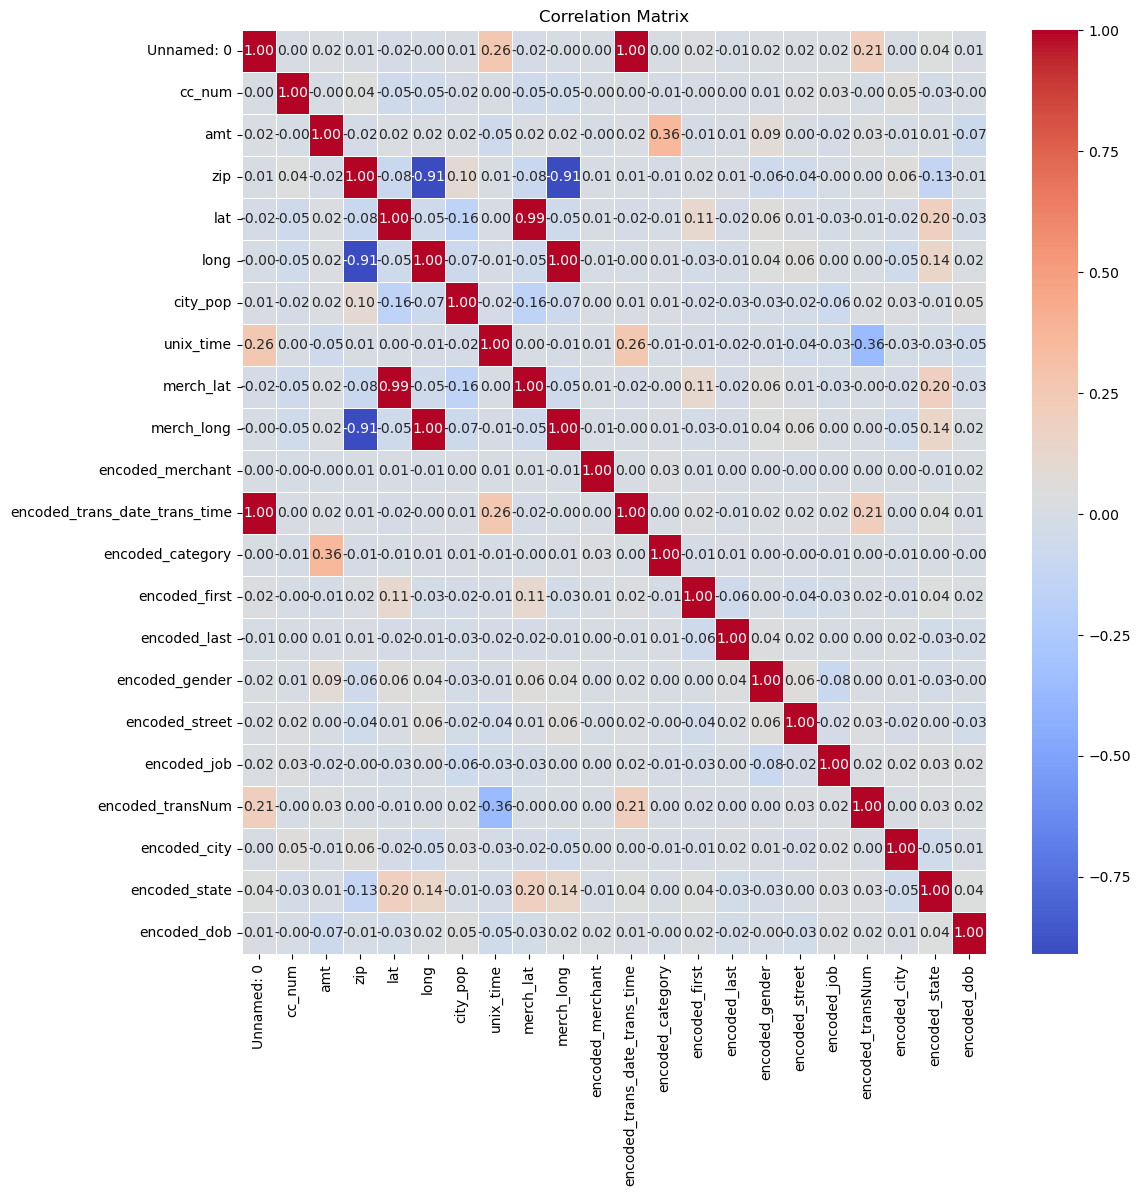

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = x_sm.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

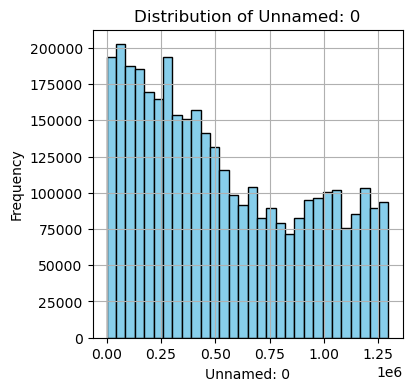

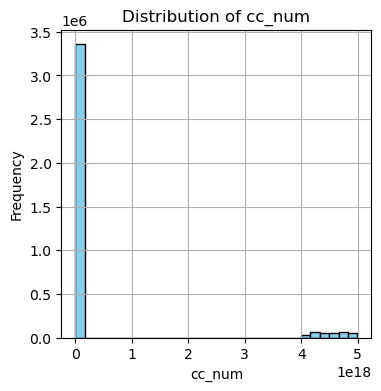

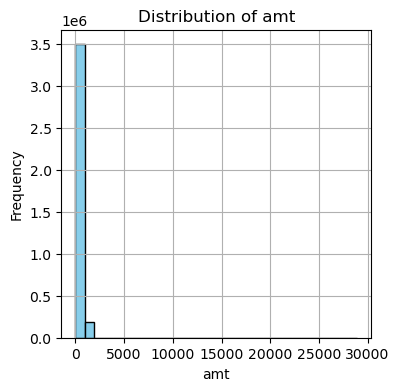

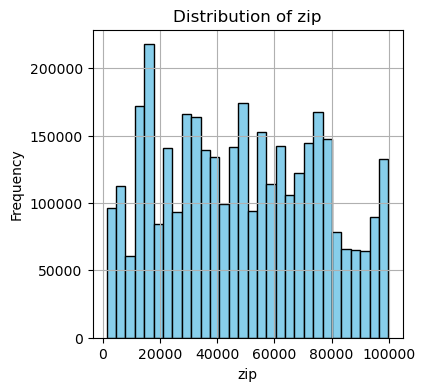

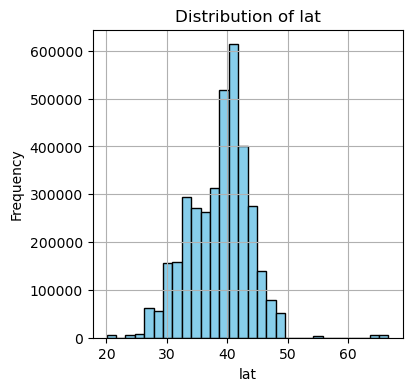

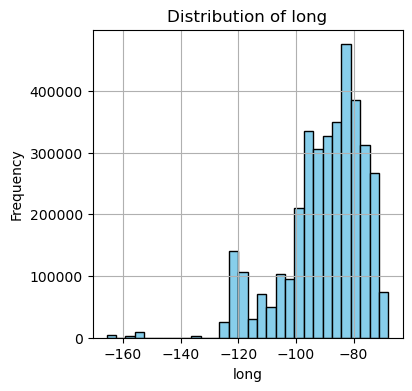

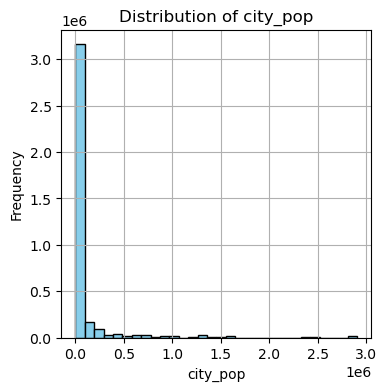

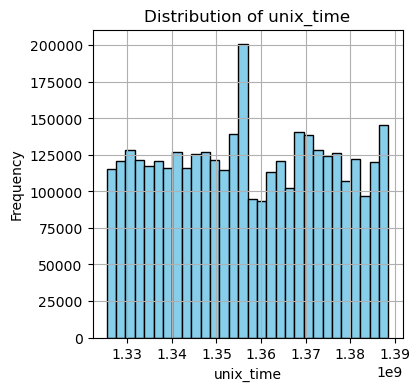

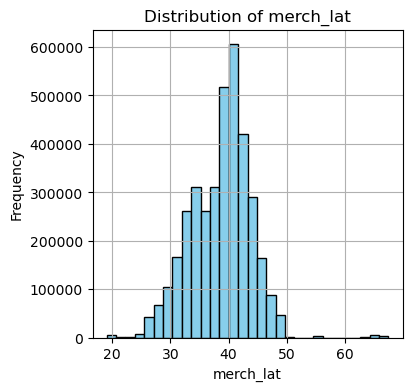

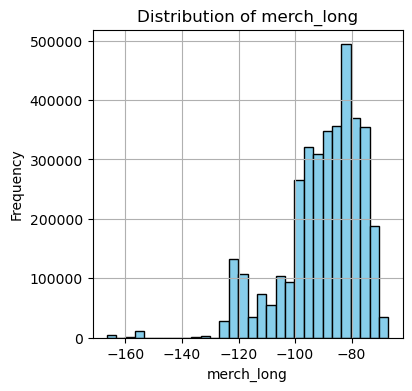

In [41]:
# Select the numeric columns
numeric_columns = x_sm.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(4, 4))
    plt.hist(x_sm[column], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.grid(True)
    plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(xtrain, ytrain)
yrf=clf.predict(xtest)

print("RF report\n", classification_report(ytest, yrf))
acc=accuracy_score(ytest,yrf)
pcc=precision_score(ytest,yrf)
ff=f1_score(ytest,yrf)
re=recall_score(ytest,yrf)
print("acc : ",acc)
print("pre : ",pcc)
print("f1  : ",ff)
print("re  : ",re)